In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
import os
os.chdir("/content/drive/MyDrive/edu-data")
!ls

df_video_with_country_nonan.csv     stem_video_titles_tags_0.xlsx
education_channel_with_country.csv  stem_video_titles_tags_30percent.xlsx
final_keywords.txt		    stem_video_titles_tags_50.xlsx
is_stem_column_0.csv		    video_with_channelcountry.csv
is_stem_column_30percent.csv	    video_with_channelcountry.csv.zip
keyword_counts.txt		    video_with_country_and_stem.csv
__MACOSX			    video_with_stem_titles_and_cutoff50.csv
no_econ_no_game_final_keywords.txt  video_with_stem_titles_and_cutoffs20.csv
other_channel_with_country.csv


In [81]:
import csv
import re

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Educational Content: Indian vs The World

Are Indian people devoted into making educational videos?

In [82]:
df_channel_edu = pd.read_csv('education_channel_with_country.csv')
df_channel_other = pd.read_csv('other_channel_with_country.csv')

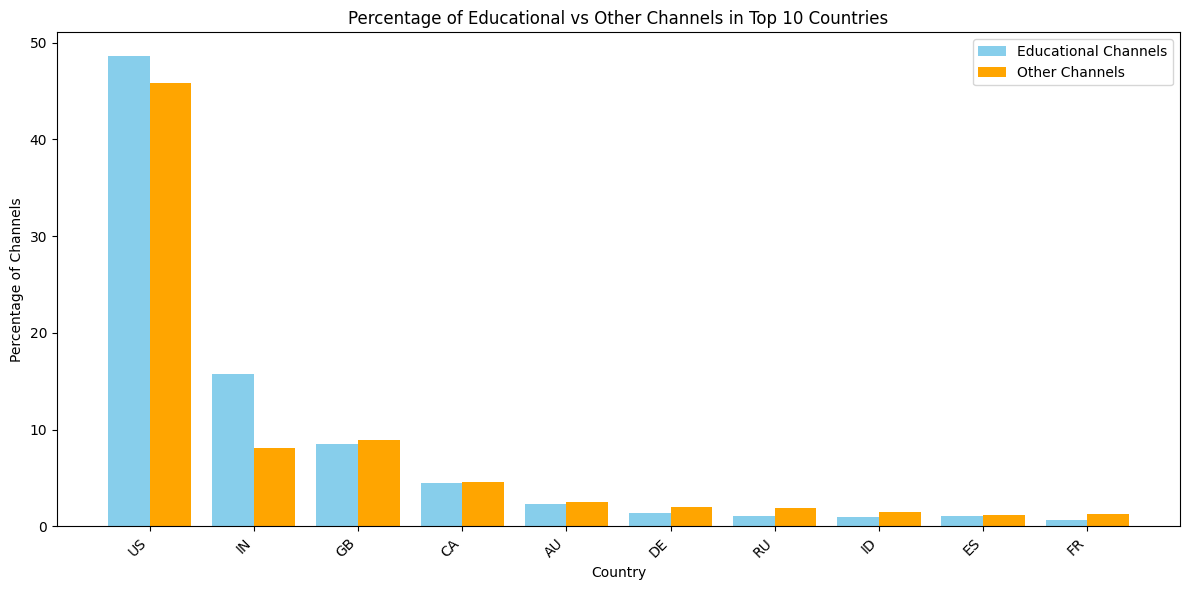

In [83]:
# Calculate the percentage of educational channels and other channels for each country
edu_country_counts = df_channel_edu['country'].value_counts(normalize=True) * 100
other_country_counts = df_channel_other['country'].value_counts(normalize=True) * 100

# Find the top 10 countries based on total percentage
total_counts = edu_country_counts.add(other_country_counts, fill_value=0)
top_10_countries = total_counts.nlargest(10).index

# Create data for the plot
edu_percentages = []
other_percentages = []

for country in top_10_countries:
    edu_percentage = edu_country_counts.get(country, 0)
    other_percentage = other_country_counts.get(country, 0)

    edu_percentages.append(edu_percentage)
    other_percentages.append(other_percentage)

# Create the bar chart with side-by-side bars
data = {'country': top_10_countries, 'edu_percentage': edu_percentages, 'other_percentage': other_percentages}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

x = range(len(top_10_countries))
width = 0.4

plt.bar([i - width/2 for i in x], df_plot['edu_percentage'], width=width, label='Educational Channels', color='skyblue')
plt.bar([i + width/2 for i in x], df_plot['other_percentage'], width=width, label='Other Channels', color='orange')

plt.xlabel('Country')
plt.ylabel('Percentage of Channels')
plt.title('Percentage of Educational vs Other Channels in Top 10 Countries')
plt.xticks(x, top_10_countries, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

The US and most other countries show minimal differences in the distribution between education and other categories. However, India stands out with a notably higher proportion of education channels compared to other types.

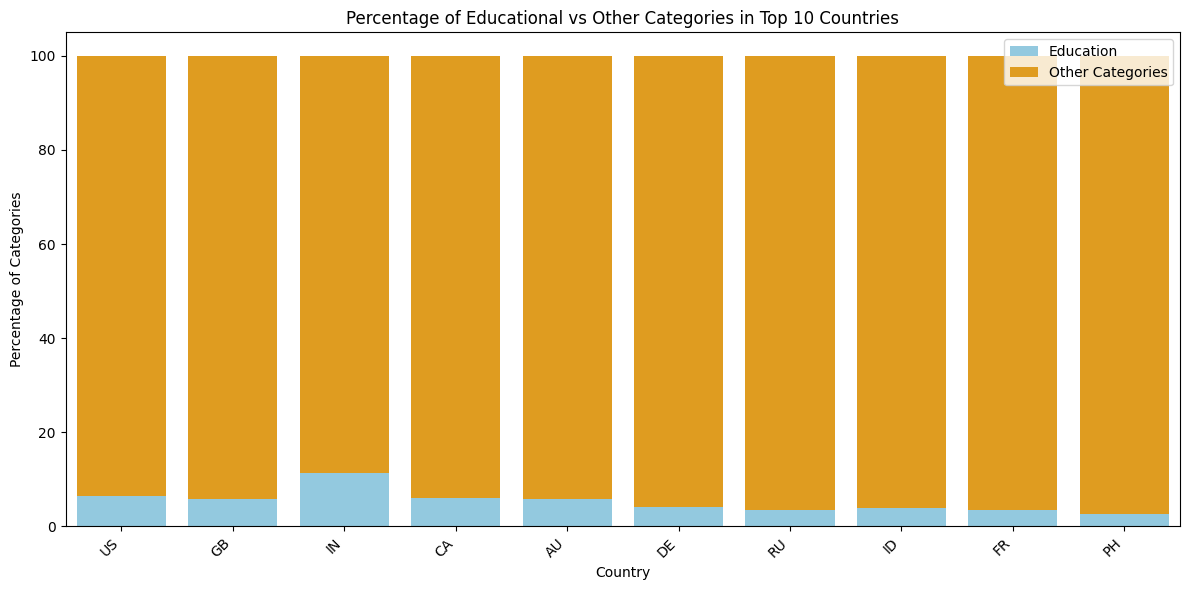

In [84]:
# Calculate the percentage of educational channels and other channels for each country
edu_country_counts = df_channel_edu['country'].value_counts()
other_country_counts = df_channel_other['country'].value_counts()

# Find the top 10 countries based on total percentage
total_counts = edu_country_counts.add(other_country_counts, fill_value=0)
top_10_countries = total_counts.nlargest(10).index

# Create data for the plot
edu_percentages = []
other_percentages = []

for country in top_10_countries:
    edu_count = edu_country_counts.get(country, 0)
    other_count = other_country_counts.get(country, 0)
    total_count = edu_count + other_count

    if total_count > 0:
        edu_percentage = (edu_count / total_count) * 100
        other_percentage = (other_count / total_count) * 100
    else:
        edu_percentage = 0
        other_percentage = 0

    edu_percentages.append(edu_percentage)
    other_percentages.append(other_percentage)

# Create the stacked bar chart
data = {'country': top_10_countries, 'edu_percentage': edu_percentages, 'other_percentage': other_percentages}
df_plot = pd.DataFrame(data)

plt.figure(figsize=(12, 6))
sns.barplot(x='country', y='edu_percentage', data=df_plot, color='skyblue', label='Education')
sns.barplot(x='country', y='other_percentage', data=df_plot, color='orange', label='Other Categories', bottom=df_plot['edu_percentage'])

plt.xlabel('Country')
plt.ylabel('Percentage of Categories')
plt.title('Percentage of Educational vs Other Categories in Top 10 Countries')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

The figure shows the top 10 countries based on percentage of all channel counts.
India (IN) has a higher percentage of educational content compared to other countries even though.

## Many people say... When studying STEM, no matter how hard or how strange a subject is, there's always an Indian Tutor on YouTube to help us pass our exams. Really?

# Let's work on the video data, and we can try to categorize the STEM content...

In [85]:
# Load STEM-categorized education video data
df_video = pd.read_csv('/content/drive/MyDrive/edu-data/video_with_stem_titles_and_cutoffs20.csv')

In [86]:
len(df_video)

1911894

In [87]:
stem_videos = df_video[df_video["is_stem_cutoff_50"] == 1]
len(stem_videos)

3057

In [88]:
stem_videos.sample(10)

,categories,channel_id,crawl_date,dislike_count,display_id,duration,like_count,tags,title,upload_date,view_count,name_cc,subscribers_cc,country,is_stem_title,is_stem_cutoff_20,is_stem_cutoff_30,is_stem_cutoff_40,is_stem_cutoff_50
174949,Education,UCsyZSg-iA7aN6C_jJ2hcLNw,2019-11-21 19:09:42.374611,0.0,v6Rx4lEaLKk,658,2.0,"genetics,dna,rule of probability,product rule,statictics",rule of probability applied to genetics problems,2016-06-28 00:00:00,483.0,Nikolay's Genetics L...,12149.0,US,False,1,1,1,1
1231313,Education,UCMT9_PUrM69hmJ37C9-NDGA,2019-11-08 13:03:23.343629,0.0,2GDOwAnIhbw,182,1.0,"innovation,entrepreneurship",emib - prof. miguel palacios - innovation and entrepreneurship,2017-03-16 00:00:00,182.0,ESCP Europe,14000.0,FR,False,1,1,1,1
1461073,Education,UCEBb1b_L6zDS3xTUrIALZOw,2019-11-08 18:49:29.288976,4.0,KXof0q88xbg,516,95.0,"multivariable calculus,vectors,matrices,partial derivatives,double integrals,line integrals,triple integrals,surface integrals","green's theorem: area under an arch | mit 18.02sc multivariable calculus, fall 2010",2011-01-03 00:00:00,14643.0,MIT OpenCourseWare,2084328.0,US,False,1,1,1,1
1757336,Education,UC43z90uE_gprv5oooOtLaOQ,2019-11-08 19:42:51.044060,7.0,0eFl4988MVw,1130,27.0,"#positivity,#motivation",ways to motivate,2019-06-28 00:00:00,247.0,Rebecca W,10100.0,US,False,1,1,1,1
543075,Education,UCh6KFtW4a4Ozr81GI1cxaBQ,2019-11-23 06:23:30.861902,0.0,4bYOwkvqg9Q,1626,14.0,"prostate,cancer,immunotherapy",prostate cancer immunotherapy,2019-06-19 00:00:00,699.0,University of Califo...,474000.0,US,False,1,1,1,1
1636605,Education,UC85BaVmStZexddgDR2vmqTQ,2019-11-23 03:30:12.063854,10.0,umZxd3bs8lw,3906,172.0,"physics,pradeep kshetrapal","xii.78_semiconductor, led,solar cell(2013)",2013-11-26 00:00:00,19230.0,Pradeep Kshetrapal,733000.0,IN,False,1,1,1,1
94804,Education,UCwE-D1VMVFAsSSn8DoNuziA,2019-11-23 03:00:30.336138,NaN,sC4PPzHRuO8,429,NaN,"ufo,space",answers of an alien from andromeda - nibiru and events.update,2012-11-08 00:00:00,864.0,nano63a,24206.0,IT,False,1,1,1,1
1459443,Education,UCEBb1b_L6zDS3xTUrIALZOw,2019-11-08 18:48:04.976095,0.0,nuXDb9B3y0M,298,3.0,sample mean,l20.3 the sample mean and some terminology,2018-04-24 00:00:00,1508.0,MIT OpenCourseWare,2084328.0,US,False,1,1,1,1
1459663,Education,UCEBb1b_L6zDS3xTUrIALZOw,2019-11-08 18:48:06.942268,0.0,J1uHGy1tRmM,4122,34.0,"symmetry,infinitely long system,boundary conditions,wave equations",8. translation symmetry,2018-04-18 00:00:00,3484.0,MIT OpenCourseWare,2084328.0,US,False,1,1,1,1
1461112,Education,UCEBb1b_L6zDS3xTUrIALZOw,2019-11-08 18:49:25.947564,2.0,gzbWF-IdscE,503,98.0,"multivariable calculus,vectors,matrices,partial derivatives,double integrals,line integrals,triple integrals,surface integrals","level curves and critical points | mit 18.02sc multivariable calculus, fall 2010",2011-01-03 00:00:00,25833.0,MIT OpenCourseWare,2084328.0,US,False,1,1,1,1


<ipython-input-89-b13d1275c50b>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_10_countries["total_percentage"] = (top_10_countries["count"] / len(df_video)) * 100


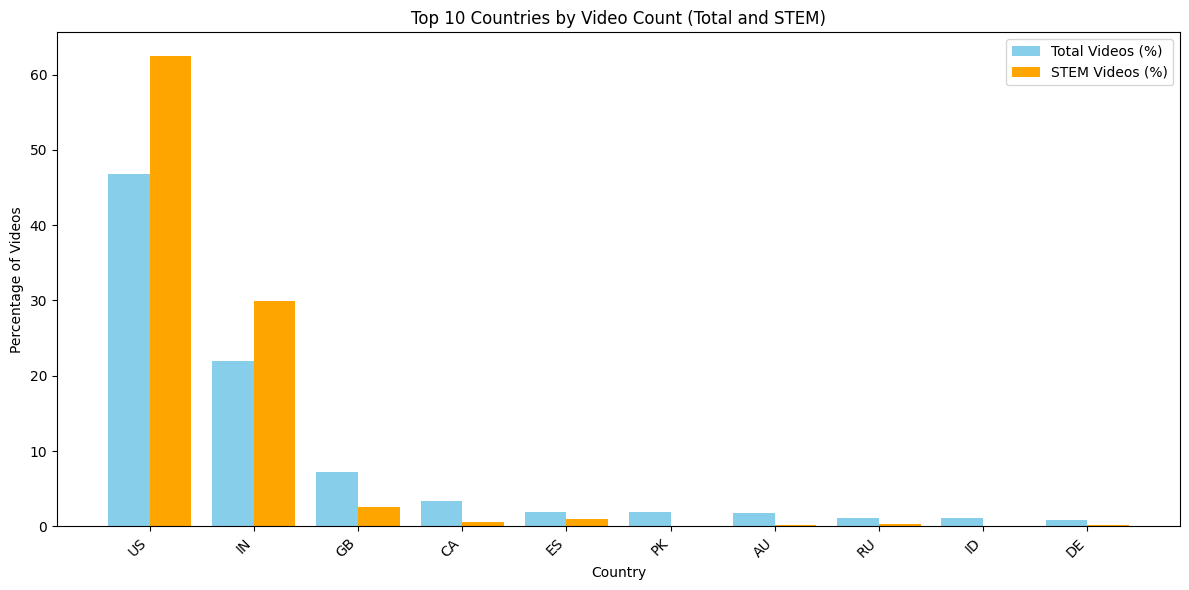

In [89]:
# Group by country and count videos
country_counts = df_video.groupby("country").size().reset_index(name='count').sort_values('count', ascending=False)

# Get the top 10 countries
top_10_countries = country_counts.head(10)

# Calculate relative percentages
top_10_countries["total_percentage"] = (top_10_countries["count"] / len(df_video)) * 100

# Similarly, use pandas methods for stem_country_counts
stem_country_counts = stem_videos.groupby("country").size().reset_index(name='count').sort_values('count', ascending=False)

# Merge dataframes (no change needed here)
top_10_countries = pd.merge(top_10_countries, stem_country_counts, on="country", how="left", suffixes=("_total","_stem"))
top_10_countries["stem_percentage"] = (top_10_countries["count_stem"] / len(stem_videos)) * 100
top_10_countries.fillna(0, inplace=True)

# Plotting
plt.figure(figsize=(12, 6))

bar_width = 0.4

# Total Video Percentage
plt.bar(np.arange(len(top_10_countries)), top_10_countries["total_percentage"], width=bar_width, label="Total Videos (%)", color='skyblue')

# STEM Video Percentage
plt.bar(np.arange(len(top_10_countries)) + bar_width, top_10_countries["stem_percentage"], width=bar_width, label="STEM Videos (%)", color='orange')


plt.xlabel("Country")
plt.ylabel("Percentage of Videos")
plt.title("Top 10 Countries by Video Count (Total and STEM)")
plt.xticks(np.arange(len(top_10_countries)) + bar_width / 2, top_10_countries["country"], rotation=45, ha="right")
plt.legend()
plt.tight_layout()
plt.show()

From the above graph, it seems like the US and India has the significance of STEM Videos percentage compared to others. Let's take a deeper look into this:

In [97]:
# Convert the 'upload_date' column to datetime objects
stem_videos['upload_date'] = pd.to_datetime(stem_videos['upload_date'], format="%Y-%m-%d %H:%M:%S")

# Extract the year from the 'upload_date'
stem_videos['upload_year'] = stem_videos['upload_date'].dt.year

<ipython-input-97-921134316267>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stem_videos['upload_date'] = pd.to_datetime(stem_videos['upload_date'], format="%Y-%m-%d %H:%M:%S")
<ipython-input-97-921134316267>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stem_videos['upload_year'] = stem_videos['upload_date'].dt.year


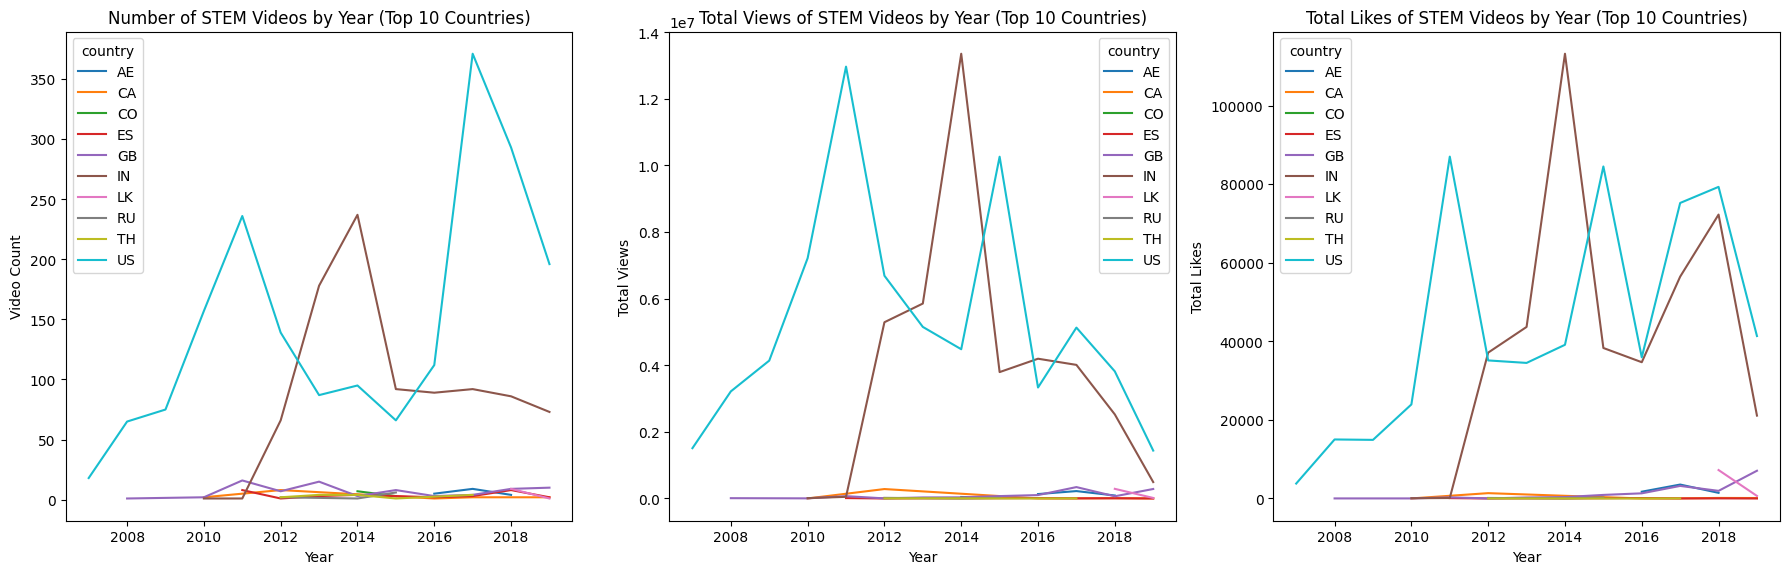

In [98]:
# Group data by country and year
grouped_data = stem_videos.groupby(["country", "upload_year"]).agg(
    video_count=("upload_year", "size"),
    total_views=("view_count", "sum"),
    total_likes=("like_count", "sum")
).reset_index()

# Get the top 10 countries with the most STEM videos
stem_country_counts = grouped_data.groupby("country")["video_count"].sum().reset_index()
stem_country_counts = stem_country_counts.rename(columns={"video_count": "count"})
top_10_countries = stem_country_counts.sort_values("count", ascending=False).head(10)
top_10_countries_list = top_10_countries["country"].tolist()

# Filter data for the top 10 countries
top_10_df = grouped_data[grouped_data["country"].isin(top_10_countries_list)]

# Plotting
plt.figure(figsize=(18, 6))

# Setting the hue order
sorted_countries = sorted(top_10_df['country'].unique())

# Video count
plt.subplot(1, 3, 1)
sns.lineplot(x="upload_year", y="video_count", hue="country", hue_order=sorted_countries, data=top_10_df)
plt.title("Number of STEM Videos by Year (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Video Count")

# View count
plt.subplot(1, 3, 2)
sns.lineplot(x="upload_year", y="total_views", hue="country", hue_order=sorted_countries, data=top_10_df)
plt.title("Total Views of STEM Videos by Year (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Total Views")

# Like count
plt.subplot(1, 3, 3)
sns.lineplot(x="upload_year", y="total_likes", hue="country", hue_order=sorted_countries, data=top_10_df)
plt.title("Total Likes of STEM Videos by Year (Top 10 Countries)")
plt.xlabel("Year")
plt.ylabel("Total Likes")

plt.tight_layout()
plt.show()

Not just percentage-wise, temporal-wise, it seems like the US (in blue) and India (in brown) has long been "competitor" in STEM content creation! And we can also observe how US started the "trend" first, with its peak happen at around 2011 while that of India started somewhere in 2014. Interestingly, by 2019, we can see that the number of videos of US is significantly higher, however the difference in their view and like count is much more negligible. So even though Indians might still catching up with the quantity, its quality has already reached similar level as its competitor!

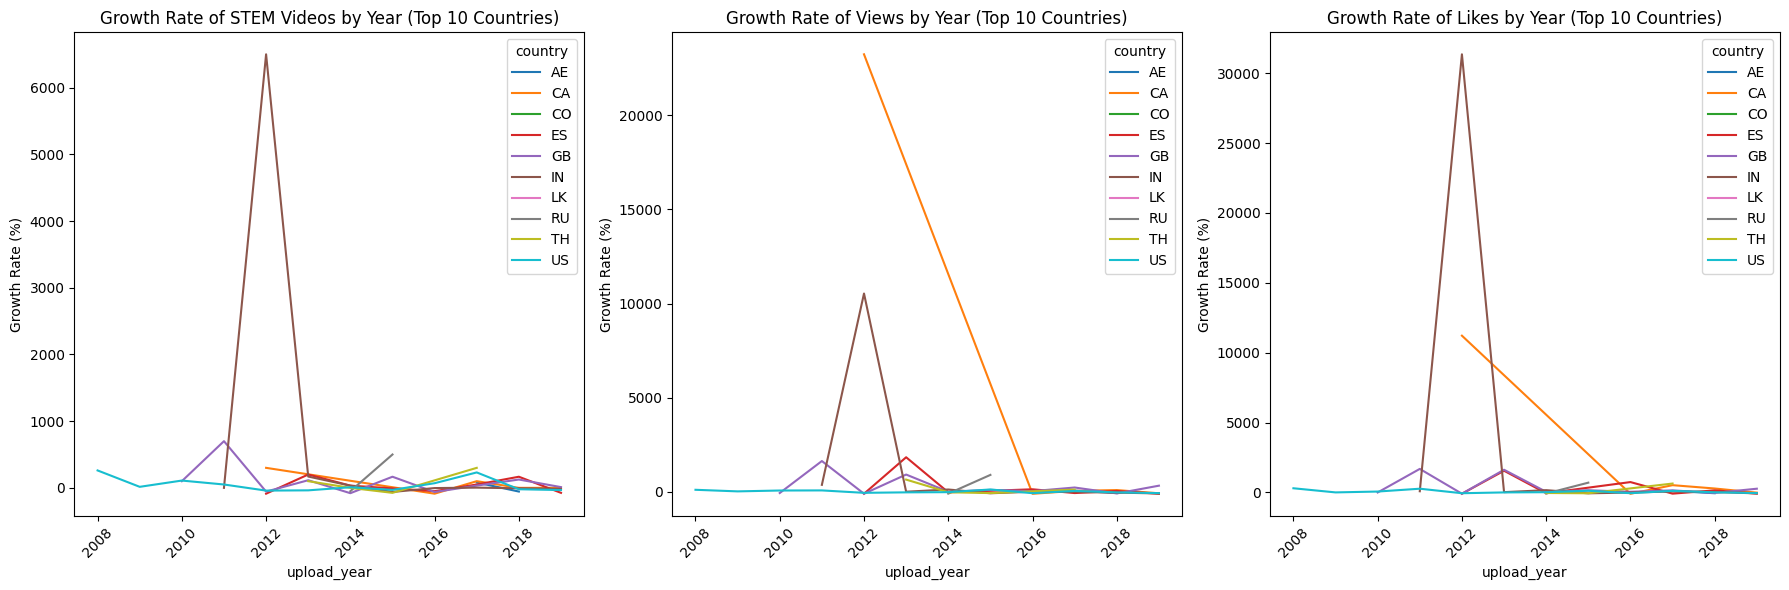

In [99]:
# Calculate year-over-year percentage change
def calculate_growth_rate(df, group_by, column, new_column_name):
    df_sorted = df.sort_values([group_by, 'upload_year'])
    df[new_column_name] = df.groupby(group_by)[column].pct_change() * 100
    return df

# Create a copy to avoid overwriting the original dataframe
top_10_growth_df = top_10_df.copy()

# Apply the function to calculate growth rates
top_10_growth_df = calculate_growth_rate(top_10_growth_df, 'country', 'video_count', 'video_growth_rate')
top_10_growth_df = calculate_growth_rate(top_10_growth_df, 'country', 'total_views', 'views_growth_rate')
top_10_growth_df = calculate_growth_rate(top_10_growth_df, 'country', 'total_likes', 'likes_growth_rate')

# Plotting
plt.figure(figsize=(18, 6))

# Number of videos growth rate
plt.subplot(1, 3, 1)
sns.lineplot(x="upload_year", y="video_growth_rate", hue="country", hue_order=sorted_countries, data=top_10_growth_df)
plt.title("Growth Rate of STEM Videos by Year (Top 10 Countries)")
plt.xticks(rotation=45)
plt.ylabel("Growth Rate (%)")

# Total views growth rate
plt.subplot(1, 3, 2)
sns.lineplot(x="upload_year", y="views_growth_rate", hue="country", hue_order=sorted_countries, data=top_10_growth_df)
plt.title("Growth Rate of Views by Year (Top 10 Countries)")
plt.xticks(rotation=45)
plt.ylabel("Growth Rate (%)")

# Total likes growth rate
plt.subplot(1, 3, 3)
sns.lineplot(x="upload_year", y="likes_growth_rate", hue="country", hue_order=sorted_countries, data=top_10_growth_df)
plt.title("Growth Rate of Likes by Year (Top 10 Countries)")
plt.xticks(rotation=45)
plt.ylabel("Growth Rate (%)")

plt.tight_layout()
plt.show()


Even in terms of growth rate, we can observe significant peaks for Indians whereas the growth for US seems much more "stable".

TODO: MORE TEXT ON HOW THE TREND IS INTERESTING.

# Yes, now we know Indian loves making educational videos to share their knowledge, especially in STEM content, but are they popular?
We can compare between US and India because they are both english speaking and have similar share of STEM videos on YouTube.

In [100]:
# Rename the 'channel' column to 'channel_id' in df_channel_edu
df_channel_edu = df_channel_edu.rename(columns={"channel": "channel_id"})

# Filter stem_videos for IN and US separately
stem_videos_in = stem_videos[stem_videos["country"] == "IN"]
stem_videos_us = stem_videos[stem_videos["country"] == "US"]

# Columns to keep from df_channel_edu
columns_to_keep_from_edu = ['channel_id', 'category_cc', 'join_date', 'name_cc', 'subscribers_cc', 'videos_cc', 'subscriber_rank_sb', 'country']

# Join with df_channel_edu for IN and select desired columns
merged_df_in = stem_videos_in[['channel_id']].merge(df_channel_edu[columns_to_keep_from_edu], on="channel_id", how="inner")
merged_df_in = merged_df_in.drop_duplicates(subset=["channel_id"])  # Make channel_id unique

# Join with df_channel_edu for US and select desired columns
merged_df_us = stem_videos_us[['channel_id']].merge(df_channel_edu[columns_to_keep_from_edu], on="channel_id", how="inner")
merged_df_us = merged_df_us.drop_duplicates(subset=["channel_id"])  # Make channel_id unique

In [101]:
top_5_in = merged_df_in.sort_values('subscribers_cc', ascending=False).head(5)
top_5_in[['name_cc', 'subscribers_cc']]

,name_cc,subscribers_cc
50,Research Tv India,5023489
141,Unacademy Studios - ...,3600000
13,Topicstudy,3025249
1,Drkirti vikram singh...,1450000
140,Mann ki aawaz Motiva...,1240000


In [102]:
top_5_us = merged_df_us.sort_values('subscribers_cc', ascending=False).head(5)
top_5_us[['name_cc', 'subscribers_cc']]

,name_cc,subscribers_cc
864,Veritasium,6370000
1854,Khan Academy,5060000
1006,MIT OpenCourseWare,2084328
852,Evan Carmichael,2020000
1795,Physics Girl,1370000


Do you recognize some Indian creator's channel name? How about the US? Sounds much more familiar isn't it? 🤔

Let's also look at how the trend for channels emerge for India vs US.

In [103]:
# Function to extract year from join_date
def extract_year(df):
    # Convert join_date to datetime and extract the year
    df['join_year'] = pd.to_datetime(df['join_date'], errors='coerce').dt.year
    return df

# Convert subscribers_cc to numeric, coercing errors to NaN
merged_df_in['subscribers_cc'] = pd.to_numeric(merged_df_in['subscribers_cc'], errors='coerce')
merged_df_us['subscribers_cc'] = pd.to_numeric(merged_df_us['subscribers_cc'], errors='coerce')

# Extract year from join_date
merged_df_in = extract_year(merged_df_in)
merged_df_us = extract_year(merged_df_us)

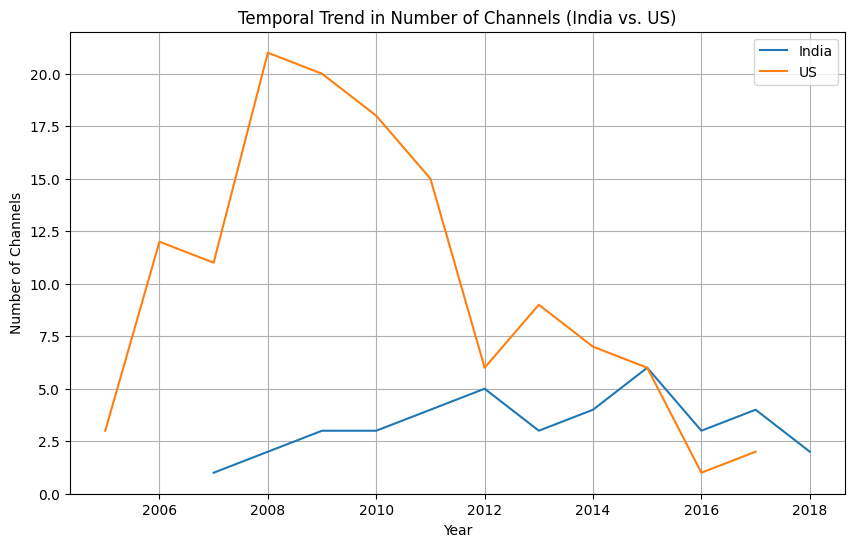

In [104]:
# Group data by year and count channels
channel_trend_in = merged_df_in.groupby('join_year')['channel_id'].count().reset_index()
channel_trend_us = merged_df_us.groupby('join_year')['channel_id'].count().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x='join_year', y='channel_id', data=channel_trend_in, label='India')
sns.lineplot(x='join_year', y='channel_id', data=channel_trend_us, label='US')
plt.xlabel('Year')
plt.ylabel('Number of Channels')
plt.title('Temporal Trend in Number of Channels (India vs. US)')
plt.legend()
plt.grid(True)
plt.show()

The downfall of US STEM channel and the rise of the Indians...

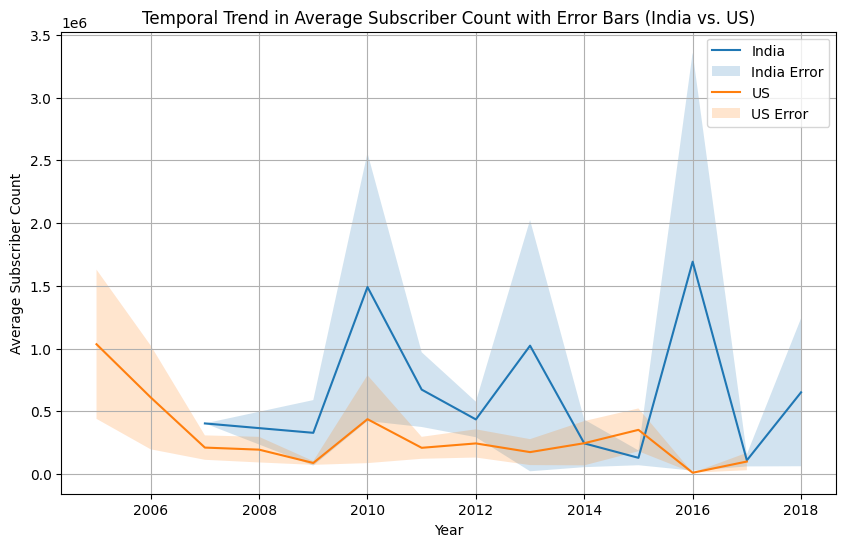

In [105]:
from scipy.stats import sem

# Group by year and calculate mean and SEM for subscriber count
subscriber_trend_in = (
    merged_df_in.groupby('join_year')
    .agg(
        mean_subscribers=('subscribers_cc', 'mean'),
        sem_subscribers=('subscribers_cc', lambda x: sem(x) if len(x) > 1 else 0)
    )
    .reset_index()
)

subscriber_trend_us = (
    merged_df_us.groupby('join_year')
    .agg(
        mean_subscribers=('subscribers_cc', 'mean'),
        sem_subscribers=('subscribers_cc', lambda x: sem(x) if len(x) > 1 else 0)
    )
    .reset_index()
)

# Plotting with error bars
plt.figure(figsize=(10, 6))
sns.lineplot(
    x='join_year',
    y='mean_subscribers',
    data=subscriber_trend_in,
    label='India',
    errorbar=None
)
plt.fill_between(
    subscriber_trend_in['join_year'],
    subscriber_trend_in['mean_subscribers'] - subscriber_trend_in['sem_subscribers'],
    subscriber_trend_in['mean_subscribers'] + subscriber_trend_in['sem_subscribers'],
    alpha=0.2,
    label='India Error'
)
sns.lineplot(
    x='join_year',
    y='mean_subscribers',
    data=subscriber_trend_us,
    label='US',
    errorbar=None
)
plt.fill_between(
    subscriber_trend_us['join_year'],
    subscriber_trend_us['mean_subscribers'] - subscriber_trend_us['sem_subscribers'],
    subscriber_trend_us['mean_subscribers'] + subscriber_trend_us['sem_subscribers'],
    alpha=0.2,
    label='US Error'
)

# Labels and title
plt.xlabel('Year')
plt.ylabel('Average Subscriber Count')
plt.title('Temporal Trend in Average Subscriber Count with Error Bars (India vs. US)')
plt.legend()
plt.grid(True)
plt.show()

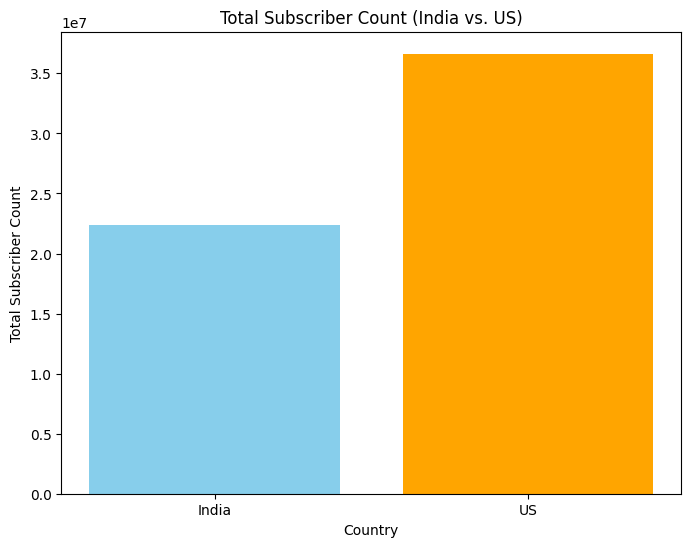

In [106]:
# Calculate total subscriber count for IN and US
total_subscribers_in = merged_df_in['subscribers_cc'].sum()
total_subscribers_us = merged_df_us['subscribers_cc'].sum()

# Create the bar chart
countries = ['India', 'US']
subscribers = [total_subscribers_in, total_subscribers_us]

plt.figure(figsize=(8, 6))
plt.bar(countries, subscribers, color=['skyblue', 'orange'])
plt.xlabel('Country')
plt.ylabel('Total Subscriber Count')
plt.title('Total Subscriber Count (India vs. US)')
plt.show()

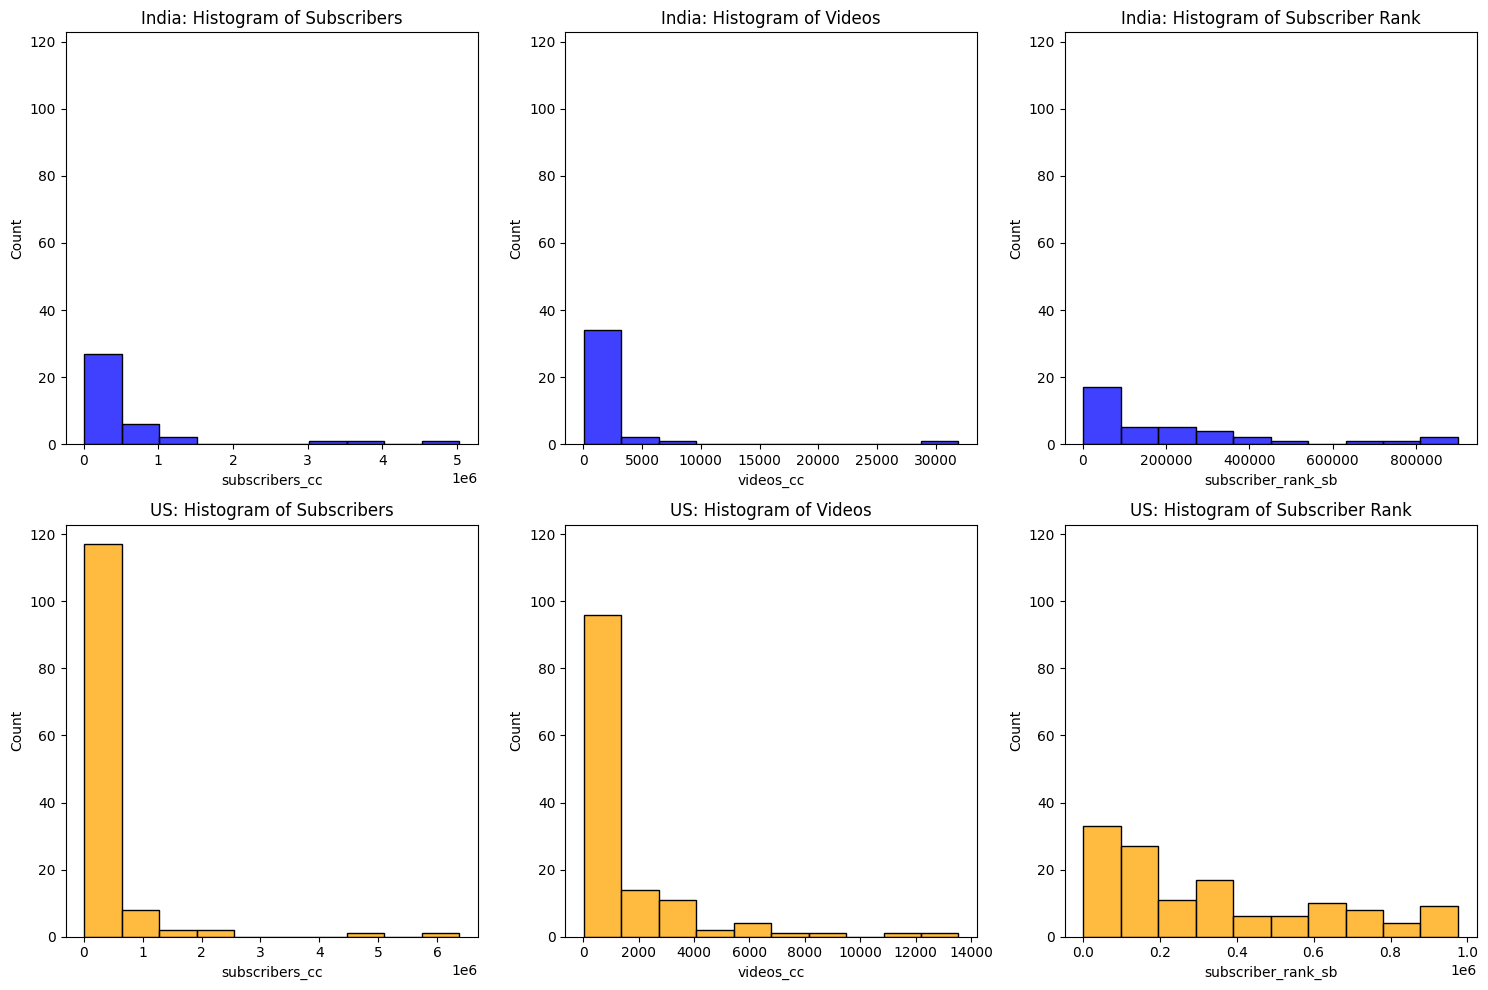

In [107]:
# Set the colors for India and US
india_color = 'blue'
us_color = 'orange'

# Assuming you have 'merged_df_in' and 'merged_df_us' DataFrames for India and US respectively
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Plot India histograms
sns.histplot(merged_df_in['subscribers_cc'], bins=10, ax=axes[0, 0], color=india_color)
axes[0, 0].set_title('India: Histogram of Subscribers')

sns.histplot(merged_df_in['videos_cc'], bins=10, ax=axes[0, 1], color=india_color)
axes[0, 1].set_title('India: Histogram of Videos')

sns.histplot(merged_df_in['subscriber_rank_sb'], bins=10, ax=axes[0, 2], color=india_color)
axes[0, 2].set_title('India: Histogram of Subscriber Rank')

# Plot US histograms
sns.histplot(merged_df_us['subscribers_cc'], bins=10, ax=axes[1, 0], color=us_color)
axes[1, 0].set_title('US: Histogram of Subscribers')

sns.histplot(merged_df_us['videos_cc'], bins=10, ax=axes[1, 1], color=us_color)
axes[1, 1].set_title('US: Histogram of Videos')

sns.histplot(merged_df_us['subscriber_rank_sb'], bins=10, ax=axes[1, 2], color=us_color)
axes[1, 2].set_title('US: Histogram of Subscriber Rank')

# Find the maximum y-value across all subplots for equal y-axis range
y_max = max(ax.get_ylim()[1] for ax in axes.flat)

# Set the same y-axis range for all subplots
for ax in axes.flat:
    ax.set_ylim(0, y_max)

# Display the plot
plt.tight_layout()
plt.show()


TODO: Fix colors

For US, the trend seems like they have a small number of very influential creators that consistently create contents over the year; For Indian, it's more distributed, with more channels though of lower subscriber counts - yet it's booming! (and still booming)

TODO:
* Topic breakdown + example
* Engagement metrics?

Ideas:
* Correlational Analysis - what drives them to make vids - likes, views, ?
* Characteristics? e.g duration? consistent uploads??? other attributes - that might relate to their "success"
*